Manejo de completitud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
URL_MARKET_DATA="https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/market_data.csv"

In [4]:
market_dataset = pd.read_csv(URL_MARKET_DATA, sep=",")
market_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
# Amount of nullish 
market_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Observacion grafica

In [26]:
def plot_distribution(data, column):
    """Grafica la distribución de una columna: 
    histograma + boxplot si es numérica, 
    gráfico de barras si es categórica."""

    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(16, 9))

        # Boxplot
        plt.subplot(1, 2, 1)
        plt.boxplot(data[column].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
        plt.title(f'Boxplot de {column}')
        plt.xlabel(column)

        # Histograma
        plt.subplot(1, 2, 2)
        plt.hist(data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')

        plt.suptitle(f'Distribución de {column} (Numérica)', fontsize=14)
        plt.tight_layout()
        plt.show()

    else:
        # Gráfico de barras para datos categóricos
        plt.figure(figsize=(10, 6))
        data[column].value_counts().plot(kind='bar', color='coral', edgecolor='black')
        plt.title(f'Frecuencia de categorías en {column}')
        plt.xlabel('Categorías')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [19]:

def display_nullish(data: pd.DataFrame, log_scale=True):
    total_rows = len(data)
    null_percentage = (data.isnull().sum() / total_rows) * 100
    null_percentage_sorted = null_percentage.sort_values(ascending=False)

    # Log to console
    print("Porcentaje de valores nulos por columna:")
    for col, perc in null_percentage_sorted.items():
        print(f"{col}: {perc:.2f}%")

    # Plot
    plt.figure(figsize=(16, 9))
    ax = null_percentage_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Porcentaje de Valores Nulos por Columna')
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje de Nulos (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Logarithmic scale on y-axis if enabled
    if log_scale:
        ax.set_yscale('log')
        plt.ylabel('Porcentaje de Nulos (%) [escala log]')

    plt.tight_layout()
    plt.show()


In [20]:

def fill_missing_values(df):
    df_filled = df.copy()

    for col in df_filled.select_dtypes(include='number').columns:
        df_filled[col].fillna(df_filled[col].mean(), inplace=True)

    for col in df_filled.select_dtypes(include='object').columns:
        if not df_filled[col].mode().empty:
            df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)
        else:
            df_filled[col].fillna('Desconocido', inplace=True)

    for col in df_filled.select_dtypes(include='datetime').columns:
        df_filled[col].fillna(df_filled[col].median(), inplace=True)

    return df_filled


Porcentaje de valores nulos por columna:
Outlet_Size: 28.28%
Item_Weight: 17.17%
Item_Fat_Content: 0.00%
Item_Identifier: 0.00%
Item_Visibility: 0.00%
Item_Type: 0.00%
Outlet_Identifier: 0.00%
Item_MRP: 0.00%
Outlet_Establishment_Year: 0.00%
Outlet_Location_Type: 0.00%
Outlet_Type: 0.00%
Item_Outlet_Sales: 0.00%


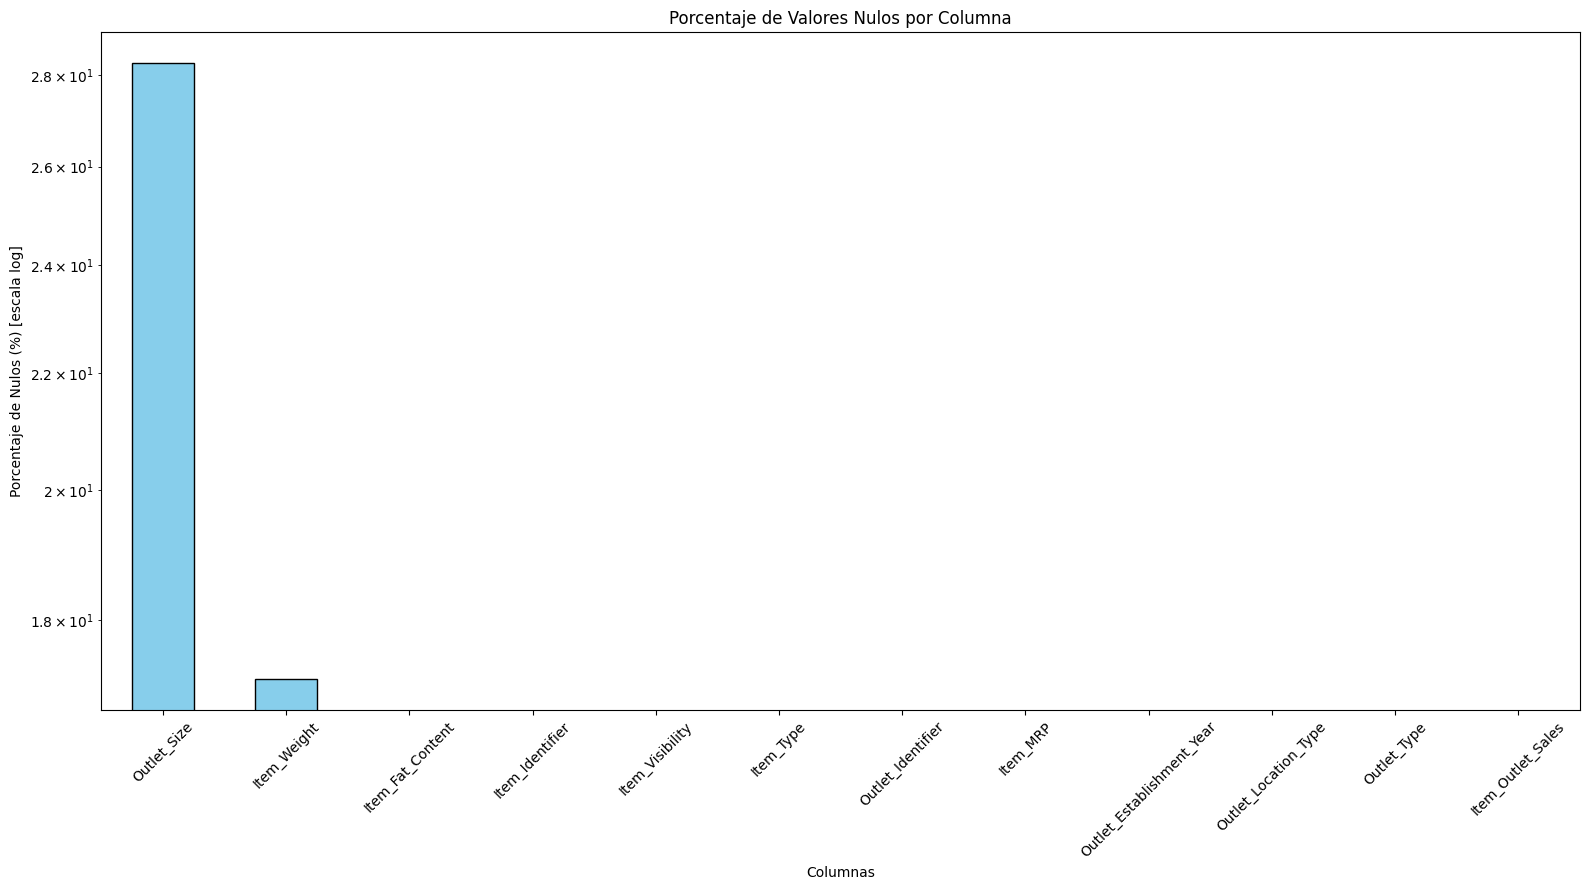

In [21]:
display_nullish(market_dataset)

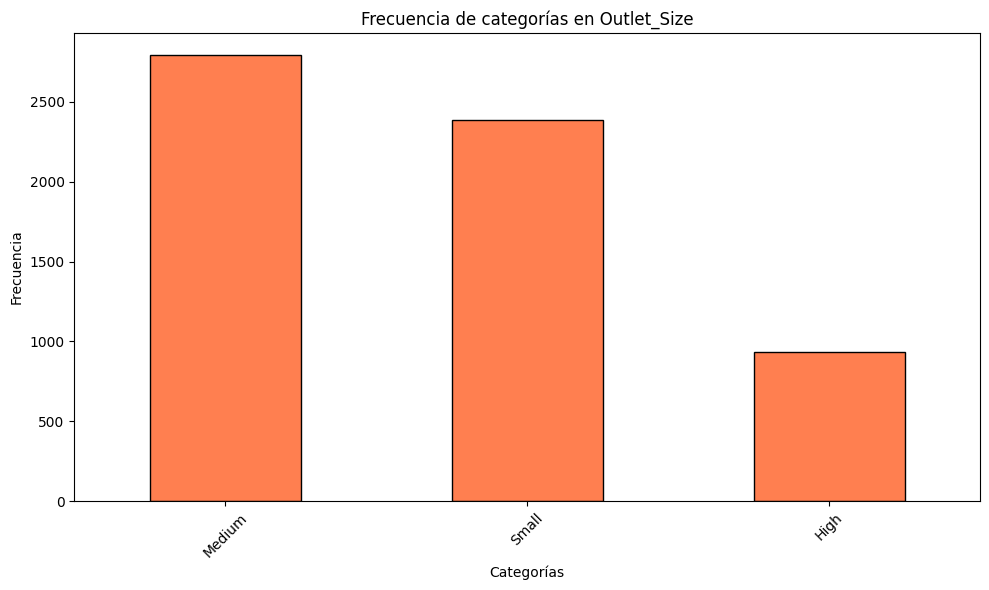

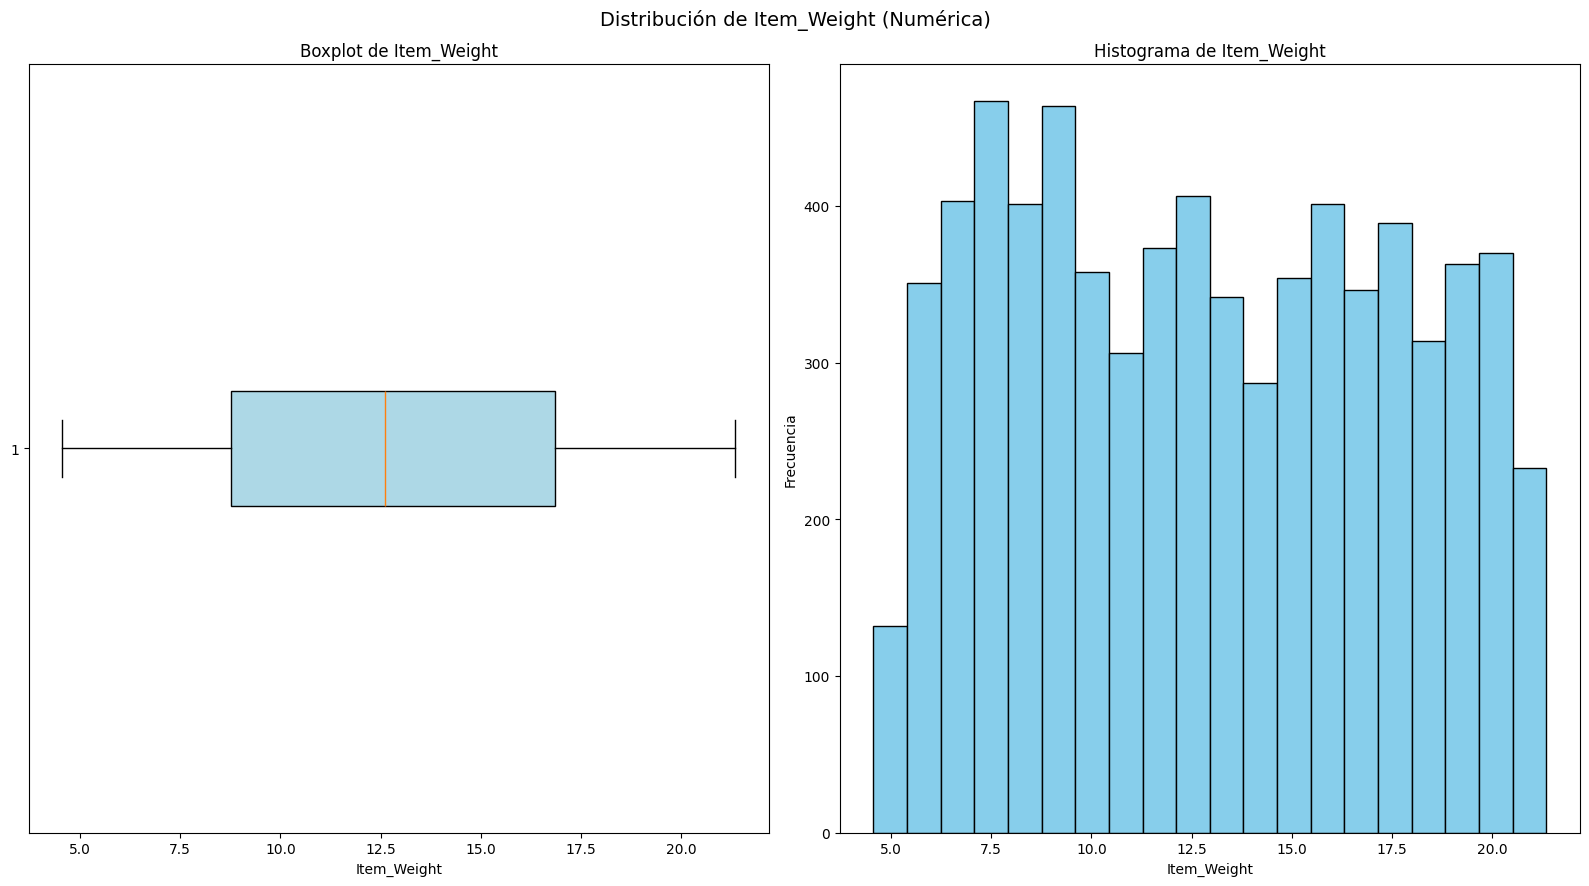

In [31]:
plot_distribution(market_dataset,"Outlet_Size")
plot_distribution(market_dataset,"Item_Weight")

/tmp/ipykernel_6786/1795500049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)
/tmp/ipykernel_6786/1795500049.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Porcentaje de valores nulos por columna:
Item_Identifier: 0.00%
Item_Weight: 0.00%
Item_Fat_Content: 0.00%
Item_Visibility: 0.00%
Item_Type: 0.00%
Item_MRP: 0.00%
Outlet_Identifier: 0.00%
Outlet_Establishment_Year: 0.00%
Outlet_Size: 0.00%
Outlet_Location_Type: 0.00%
Outlet_Type: 0.00%
Item_Outlet_Sales: 0.00%


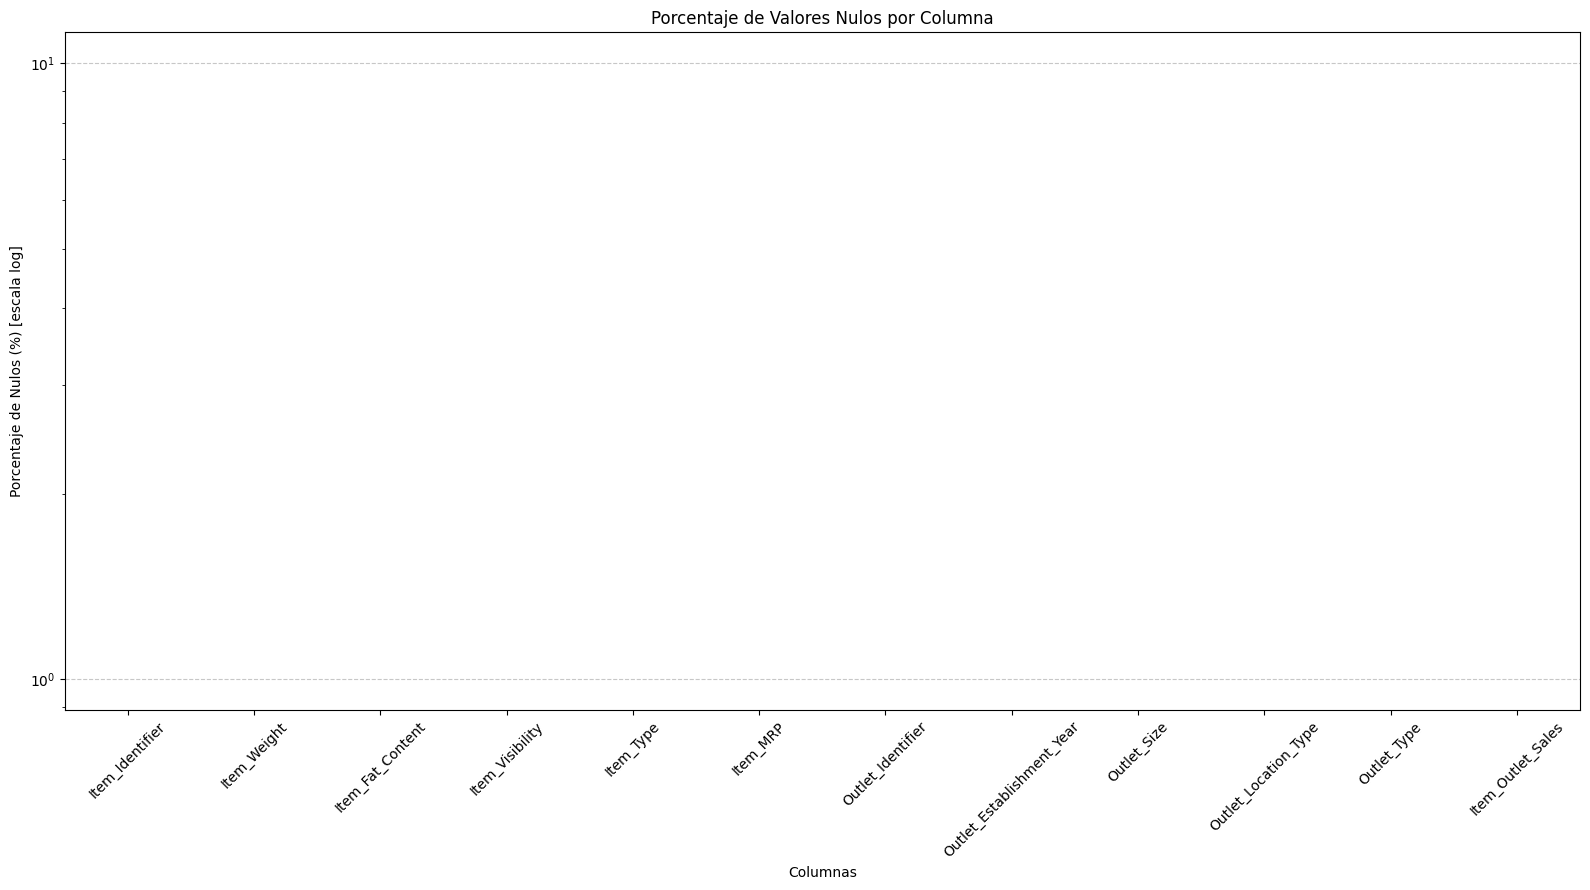

In [22]:
temp_market = fill_missing_values(market_dataset)
display_nullish(temp_market)

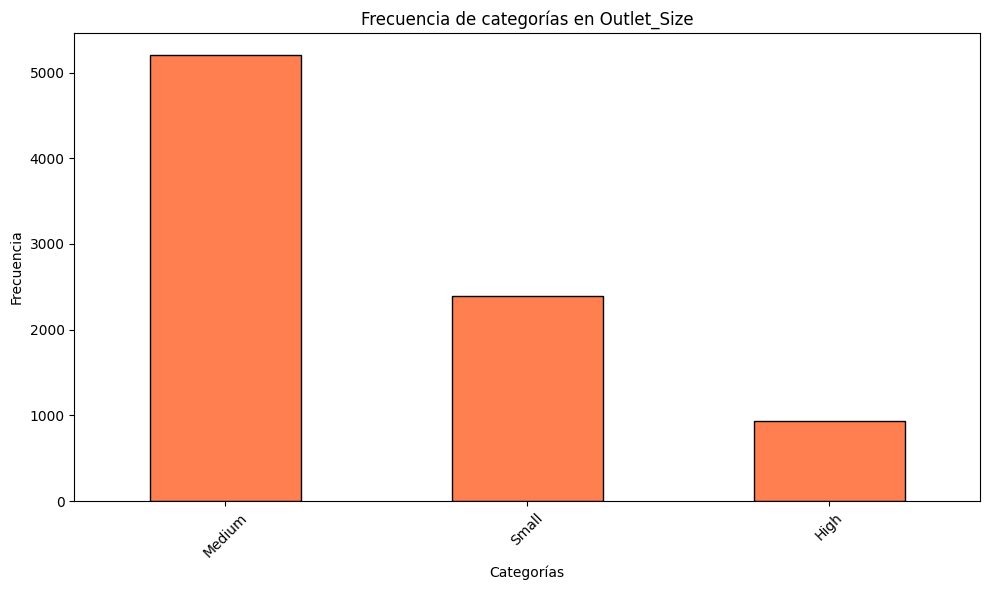

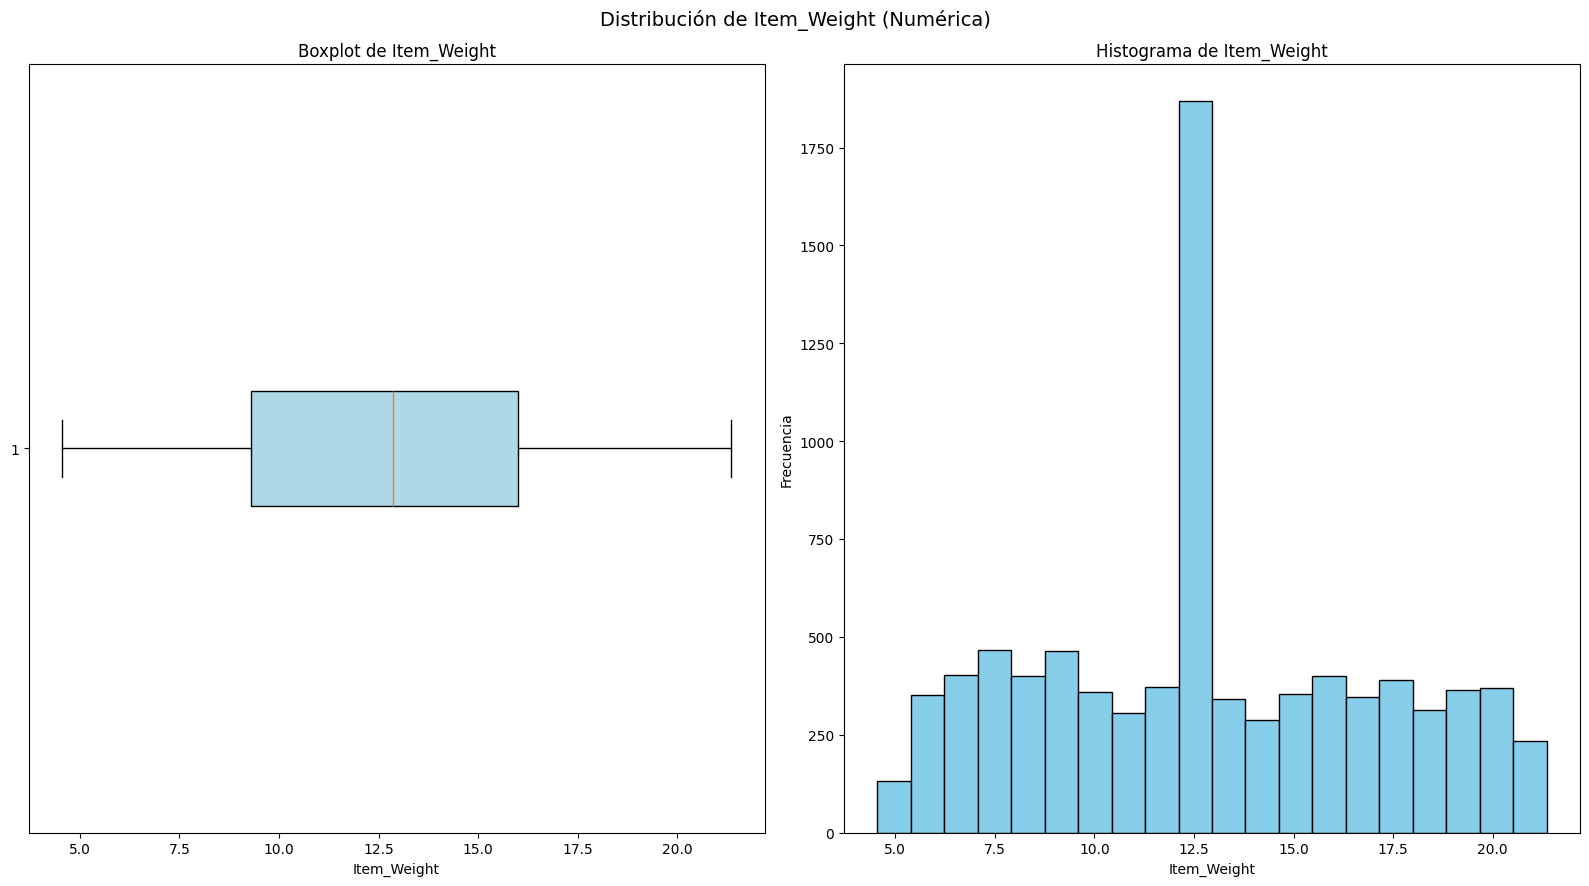

In [29]:
plot_distribution(temp_market,"Outlet_Size")
plot_distribution(temp_market,"Item_Weight")

# Imputacion por medio de dos formas mas eficientes(?)

In [33]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categoricals(df):
    """
    Aplica Label Encoding a todas las columnas categóricas de un DataFrame.
    Retorna el DataFrame codificado y un diccionario con los LabelEncoders usados.
    """
    df_encoded = df.copy()
    encoders = {}
    
    for col in df_encoded.columns:
        dtype = df[col].dtype
        if isinstance(dtype, pd.CategoricalDtype):
            le = LabelEncoder()
            df_encoded[col] = df_encoded[col].astype(str)  # Convertir a str para evitar errores con NaN
            df_encoded[col] = le.fit_transform(df_encoded[col])
            encoders[col] = le
            
    return df_encoded, encoders

def decode_categoricals(df_encoded, encoders):
    """
    Decodifica las columnas categóricas codificadas con Label Encoding.
    Recibe un DataFrame codificado y el diccionario de LabelEncoders,
    y devuelve el DataFrame con las columnas decodificadas a sus valores originales.
    """
    df_decoded = df_encoded.copy()
    
    for col, le in encoders.items():
        # Solo decodificar si la columna está en el DataFrame
        if col in df_decoded.columns:
            df_decoded[col] = le.inverse_transform(df_decoded[col].astype(int))
    
    return df_decoded


In [36]:
market_encoded, encoders =  encode_categoricals(market_dataset)

/tmp/ipykernel_6786/516170664.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_encoded[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_encoded[col]):
/tmp/ipykernel_6786/516170664.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_encoded[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_encoded[col]):
/tmp/ipykernel_6786/516170664.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_encoded[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_encoded[col]):
/tmp/ipykernel_6786/516170664.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categori

In [34]:
imputer_iter    = IterativeImputer(random_state=42)
data_iter       =   imputer_iter.fit_transform(market_dataset)
data_iter_imputed = pd.DataFrame(data_iter, columns=market_dataset.columns)


imputer_knn     = KNNImputer(n_neighbors=4)
data_knn    = imputer_knn.fit_transform(market_dataset)
data_knn_imputed = pd.DataFrame(data_knn,columns=data_knn.columns)

ValueError: could not convert string to float: 'FDA15'